<a href="https://colab.research.google.com/github/deebuls/deep_evidential_regression_loss_pytorch/blob/master/examples/plot_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/deebuls/deep_evidential_regression_loss_pytorch

  Cloning https://github.com/deebuls/deep_evidential_regression_loss_pytorch to /tmp/pip-req-build-_6zgu7no
  Running command git clone -q https://github.com/deebuls/deep_evidential_regression_loss_pytorch /tmp/pip-req-build-_6zgu7no
  Created wheel for deep-evidential-regression-loss-pytorch: filename=deep_evidential_regression_loss_pytorch-0.0.1-cp36-none-any.whl size=9547 sha256=a103d7cfdf0ead83de6b64105baefc37afe37c2286ad61fe1dca2d3f3695ca44
  Stored in directory: /tmp/pip-ephem-wheel-cache-vm98g9aj/wheels/55/4b/1c/769c7b66ab5dd04cef9dcb1e43a4797d9d467680ace7b95222
Successfully built deep-evidential-regression-loss-pytorch


In [2]:
from deep_evidential_regression_loss_pytorch import EvidentialLossSumOfSquares

In [5]:
import numpy as np
import torch
import pandas as pd
import seaborn as sns

In [12]:
criterion = EvidentialLossSumOfSquares(return_all=True)
alphas = [1.0, 1.5, 2.0]
betas = [0.1, 0.5, 1.0]
lambdas = [1.0, 1.5, 2.0]

diff = np.linspace(-1, 1, 100)
val = np.zeros(100)
val = val + diff

all_data_loss = []

for aa in alphas:
  for bb in betas:
    for ll in lambdas:
      temp = np.vstack((val, np.ones(100)*aa, np.ones(100)*bb, np.ones(100)*ll)).T
      inputs = torch.tensor(temp)
      targets = torch.zeros((100,1))
      loss_temp = criterion(inputs,targets).data.numpy()
      one_iter = np.hstack((temp, loss_temp.reshape(100,1)))
      all_data_loss.extend(one_iter)

all_data_loss = pd.DataFrame(all_data_loss, columns=['residual', 'alpha', 'beta', 'lambda', 'loss'])
all_data_loss.shape

(2700, 5)

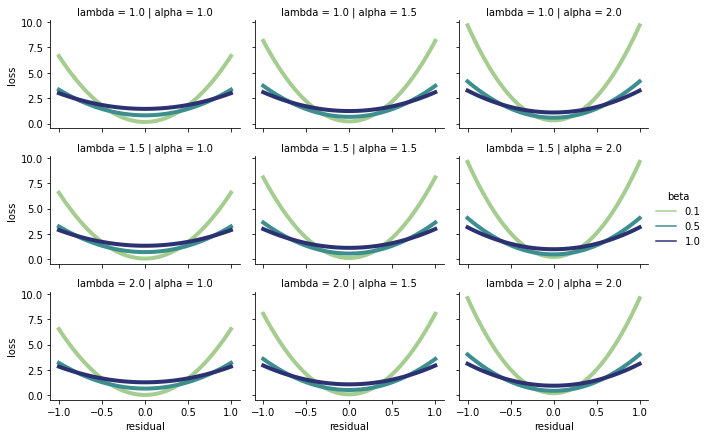

In [14]:
g = sns.relplot(
      data=all_data_loss,
      x="residual", y="loss", col="alpha", row="lambda",
      hue="beta",
      kind="line", palette="crest", linewidth=4, zorder=5,
      height=2, aspect=1.5, legend=True
  )